In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohamedhanyyy","key":"0d4320fcf967b75218bfcc8e321d2920"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        132           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        180           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        304            True  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2296           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      17737            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4434            True  
connectx

In [4]:
!kaggle competitions download -c competitive-data-science-predict-future-sales

  0% 0.00/368k [00:00<?, ?B/s]
100% 368k/368k [00:00<00:00, 55.3MB/s]
  0% 0.00/2.91k [00:00<?, ?B/s]
100% 2.91k/2.91k [00:00<00:00, 2.65MB/s]
  0% 0.00/3.49k [00:00<?, ?B/s]
100% 3.49k/3.49k [00:00<00:00, 3.68MB/s]
 38% 5.00M/13.3M [00:00<00:00, 23.3MB/s]
100% 13.3M/13.3M [00:00<00:00, 44.2MB/s]
  0% 0.00/1.02M [00:00<?, ?B/s]
100% 1.02M/1.02M [00:00<00:00, 142MB/s]
  0% 0.00/468k [00:00<?, ?B/s]
100% 468k/468k [00:00<00:00, 153MB/s]


In [5]:
!unzip -q "../content/items.csv.zip"
!unzip -q "../content/sales_train.csv.zip"
!unzip -q "../content/sample_submission.csv.zip"
!unzip -q "../content/test.csv.zip"

In [7]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Load the data 
os.listdir('../content')
sales_data = pd.read_csv('../content/sales_train.csv')
item_cat = pd.read_csv('../content/item_categories.csv')
items = pd.read_csv('../content/items.csv')
shops = pd.read_csv('../content/shops.csv')
sample_submission = pd.read_csv('../content/sample_submission.csv')
test_data = pd.read_csv('../content/test.csv')


In [9]:
sales_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [10]:
test_data.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [11]:
sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [13]:
# Function that define all the EDA we need 
def EDA(df):
    print("HEAD OF THE DATA ")
    print(df.head())
    print("INFO")
    print(df.info())
    print("Describe")
    print(df.describe())
    print("Columns")
    print(df.columns)
    print("Data Types")
    print(df.dtypes)
    print("Missing Values")
    print(df.isnull().sum())
    print("NULL values")
    print(df.isna().sum())
    print("Shape Of Data")
    print(df.shape)

In [15]:
#Litle bit of exploration of data

print("Sales Data __________________________________")
EDA(sales_data)
print("Test data_____________________________")
EDA(test_data)
print("Item Categories_____________________________")
EDA(item_cat)
print("Items______________________________________")
EDA(items)
print("Shops_______________________________")
EDA(shops)
print("Sample Submission___________________________________")
EDA(sample_submission)



Sales Data __________________________________
HEAD OF THE DATA 
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
Describe
       date_block_num       shop_id       item_id    item_price  

In [16]:
#we can see that 'date' column in sales_data is an object but if we want to manipulate  it or want to work on it someway then we have convert it on datetime format
sales_data['date'] = pd.to_datetime(sales_data['date'],format = '%d.%m.%Y')

In [17]:
sales_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [18]:
#now we will create a pivot tabel by going so we get our data in desired form 
#we want get total count value of an item over the whole month for a shop 
# That why we made shop_id and item_id our indices and date_block_num our column 
# the value we want is item_cnt_day and used sum as aggregating function 
dataset = sales_data.pivot_table(index = ['shop_id','item_id'],values = ['item_cnt_day'],columns = ['date_block_num'],fill_value = 0,aggfunc='sum')

In [20]:
dataset.head()

item_cnt_day                        ...                        
date_block_num            0   1  2  3  4  5  6  7   ... 26 27 28 29 30 31 32 33
shop_id item_id                                     ...                        
0       30                 0  31  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0
        31                 0  11  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0
        32                 6  10  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0
        33                 3   3  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0
        35                 1  14  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0

[5 rows x 34 columns]

In [21]:
# lets reset our indices, so that data should be in way we can easily manipulate
dataset.reset_index(inplace = True)

In [22]:
# lets check on our pivot table
dataset.head(3)

shop_id item_id item_cnt_day               ...                     
date_block_num                            0   1  2  3  4  ... 27 28 29 30 31 32 33
0                    0      30            0  31  0  0  0  ...  0  0  0  0  0  0  0
1                    0      31            0  11  0  0  0  ...  0  0  0  0  0  0  0
2                    0      32            6  10  0  0  0  ...  0  0  0  0  0  0  0

[3 rows x 36 columns]

In [23]:
# Now we will merge our pivot table with the test_data because we want to keep the data of items we have
# predict
dataset = pd.merge(test_data,dataset,on = ['item_id','shop_id'],how = 'left')

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [24]:
dataset.head()

,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)","(item_cnt_day, 10)","(item_cnt_day, 11)","(item_cnt_day, 12)","(item_cnt_day, 13)","(item_cnt_day, 14)","(item_cnt_day, 15)","(item_cnt_day, 16)","(item_cnt_day, 17)","(item_cnt_day, 18)","(item_cnt_day, 19)","(item_cnt_day, 20)","(item_cnt_day, 21)","(item_cnt_day, 22)","(item_cnt_day, 23)","(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# lets fill all NaN values with 0
dataset.fillna(0,inplace = True)
# lets check our data now 
dataset.head()

,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)","(item_cnt_day, 10)","(item_cnt_day, 11)","(item_cnt_day, 12)","(item_cnt_day, 13)","(item_cnt_day, 14)","(item_cnt_day, 15)","(item_cnt_day, 16)","(item_cnt_day, 17)","(item_cnt_day, 18)","(item_cnt_day, 19)","(item_cnt_day, 20)","(item_cnt_day, 21)","(item_cnt_day, 22)","(item_cnt_day, 23)","(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# we will drop shop_id and item_id because we do not need them
# we are teaching our model how to generate the next sequence 
dataset.drop(['shop_id','item_id','ID'],inplace = True, axis = 1)
dataset.head()

,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)","(item_cnt_day, 10)","(item_cnt_day, 11)","(item_cnt_day, 12)","(item_cnt_day, 13)","(item_cnt_day, 14)","(item_cnt_day, 15)","(item_cnt_day, 16)","(item_cnt_day, 17)","(item_cnt_day, 18)","(item_cnt_day, 19)","(item_cnt_day, 20)","(item_cnt_day, 21)","(item_cnt_day, 22)","(item_cnt_day, 23)","(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# X we will keep all columns execpt the last one 
X_train = np.expand_dims(dataset.values[:,:-1],axis = 2)
# the last column is our label
y_train = dataset.values[:,-1:]

# for test we keep all the columns execpt the first one
X_test = np.expand_dims(dataset.values[:,1:],axis = 2)

# lets have a look on the shape 
print(X_train.shape,y_train.shape,X_test.shape)


(214200, 33, 1) (214200, 1) (214200, 33, 1)


In [29]:
# importing libraries required for our model
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [30]:
# DEFINE our model 
model_LSTM = Sequential()
model_LSTM.add(LSTM(units =70,input_shape = (X_train.shape[1], X_train.shape[2])))
model_LSTM.add(Dropout(0.4))
model_LSTM.add(Dense(1))

model_LSTM.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error'])
model_LSTM.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 70)                20160     
_________________________________________________________________
dropout (Dropout)            (None, 70)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 71        
Total params: 20,231
Trainable params: 20,231
Non-trainable params: 0
_________________________________________________________________


In [32]:
history_lstm = model_LSTM.fit(X_train,y_train,batch_size = 4000,epochs = 12)

Epoch 1/12
54/54 [==============================] - 1s 20ms/step - loss: 30.4885 - mean_squared_error: 30.4885
Epoch 2/12
54/54 [==============================] - 1s 19ms/step - loss: 30.1435 - mean_squared_error: 30.1435
Epoch 3/12
54/54 [==============================] - 1s 19ms/step - loss: 29.9930 - mean_squared_error: 29.9930
Epoch 4/12
54/54 [==============================] - 1s 19ms/step - loss: 29.8611 - mean_squared_error: 29.8611
Epoch 5/12
54/54 [==============================] - 1s 19ms/step - loss: 29.8368 - mean_squared_error: 29.8368
Epoch 6/12
54/54 [==============================] - 1s 19ms/step - loss: 29.6879 - mean_squared_error: 29.6879
Epoch 7/12
54/54 [==============================] - 1s 19ms/step - loss: 29.7167 - mean_squared_error: 29.7167
Epoch 8/12
54/54 [==============================] - 1s 19ms/step - loss: 29.5979 - mean_squared_error: 29.5979
Epoch 9/12
54/54 [==============================] - 1s 19ms/step - loss: 29.5844 - mean_squared_error: 29.5844
E

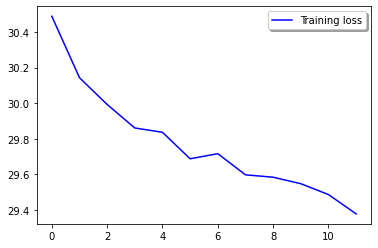

In [33]:
# Plot the loss curves for training
plt.plot(history_lstm.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

### You can now import the predictions to the submission file 